In [1]:
cd /Users/joepalmo/Desktop/cfa/SDU-preproc

/Users/joepalmo/Desktop/cfa/SDU-preproc


In [2]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from astropy.io import ascii
import os

# open source module found for converting MJD/JD to DateTimes
import jdutil as jd

# Ben's module -- THANKS BEN
import LCtools

# my preprocessing module
from preproc import *

import glob


In [3]:
# specify path to the lightcurve and spectrum
lc_path = "TDSS_data/EW_LC_ZTFr.csv"
spec_path = "TDSS_data/EW_spec.csv"

# object name (or abbreviation)
n = "EW"

# resample length for time-sorted LC purposes
resample_len = '1min'

In [4]:
#load into pandas dataframes
lc = pd.read_csv(lc_path)
spec = pd.read_csv(spec_path)

time_preproc_lc = LC_timesort_preproc(lc, resample_len=resample_len)
phase_preproc_lc = LC_phasesort_preproc(lc, bins=phase_bins())
phasefit_preproc_lc = LC_phasefit_preproc(lc_path, bins=phase_bins())
preproc_spec = spectra_preproc(spec, bins=wavelength_bins())

#create output directory
outdir = 'preproc/{}/'.format(n)
if not os.path.exists(outdir):
    os.makedirs(outdir)   

/Users/joepalmo/anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


# Period in Days

In [5]:
#load data into astropy table, sort by mjd, and remove phase
data = ascii.read(lc_path, format='csv', fast_reader=False)
data.sort('mjd')
data.remove_column('phase')

#Use LombScargle periodogram to find the best fit period (in days)
omega = LCtools.perdiodSearch(data)[0]['P'] 

print("The period is", omega, "days")

The period is 0.2609984757689015 days


# Raw Light Curve Exploration

In [6]:
print("The observations span",str(round(lc.mjd.max()-lc.mjd.min(), 2)),"days")

The observations span 596.68 days


In [7]:
len(lc)

1211

# Time Sorted Light Curve

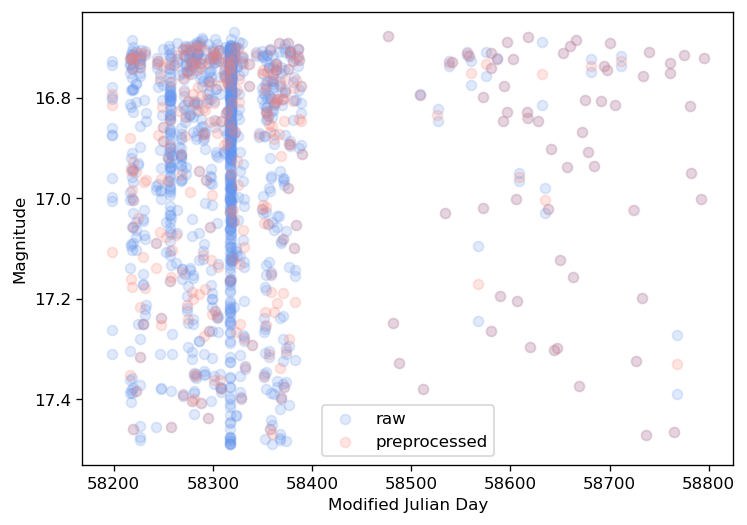

In [8]:
fig1 = plot_timesort(lc, time_preproc_lc)

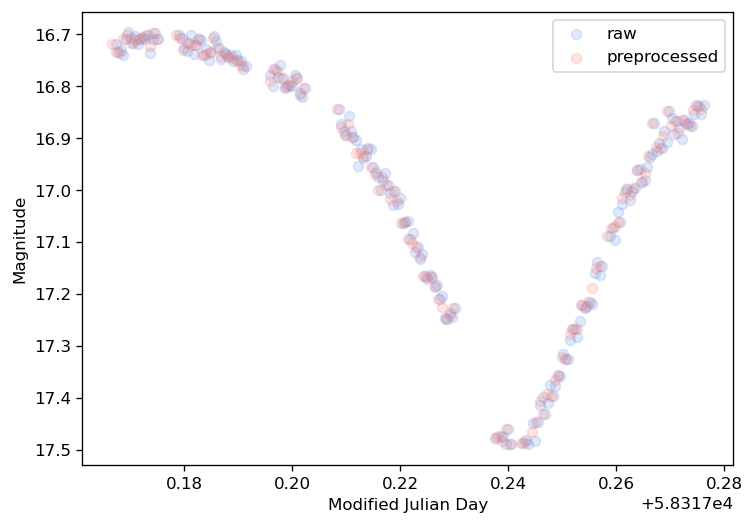

In [8]:
fig1 = plot_timesort(lc, time_preproc_lc, start=58317, end=58317.29)

In [16]:
time_preproc_lc[time_preproc_lc['Modified Julian Day'].between(58317.165, 58317.279)]

,Modified Julian Day,Magnitude,mjd
171032,58317.165278,NaN,NaN
171033,58317.165972,NaN,NaN
171034,58317.166667,16.718283,58317.167349
171035,58317.167361,16.734352,58317.167801
171036,58317.168056,16.735148,58317.168490
...,...,...,...
171191,58317.275694,16.844419,58317.276007
171192,58317.276389,NaN,NaN
171193,58317.277083,NaN,NaN
171194,58317.277778,NaN,NaN


In [17]:
len(time_preproc_lc[time_preproc_lc['Modified Julian Day'].between(58317.165, 58317.279)])

164

In [18]:
len(time_preproc_lc[time_preproc_lc['Modified Julian Day'].between(58317.165, 58317.279)].dropna())

126

In [19]:
time_preproc_lc_final = time_preproc_lc[time_preproc_lc['Modified Julian Day'].between(58317.165, 58317.279)]

In [21]:
len(lc[lc['mjd'].between(58317.165, 58317.279)])

186

In [22]:
# percent of the data taken during this one night:
len(lc[lc['mjd'].between(58317.165, 58317.279)]) / len(lc) * 100

15.359207266721716

Binning to 36 hours doesn't seem to mask any important variability artifacts from the light curve, it only muffles small scale variability   

In [23]:
# The average data play rate determined empirically from sonoUno is about 
# 8.5 data rows played per second. Therefore:
print("Estimated video time of "+ str(len(time_preproc_lc_final) / 8.5), "s")

Estimated video time of 19.294117647058822 s


# Save Preprocessed File

In [24]:
#save preprocessed files
time_preproc_lc_final.to_csv("preproc/{}/{}_LC_timesort.csv".format(n,n), index=False)
phase_preproc_lc.to_csv("preproc/{}/{}_LC_phasesort.csv".format(n,n), index=False)
phasefit_preproc_lc.to_csv("preproc/{}/{}_LC_phasefit.csv".format(n,n), index=False)
preproc_spec.to_csv("preproc/{}/{}_spec.csv".format(n,n), index=False)